In [3]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.stats import linregress # lin fit class

# Data Visual Analysis
The important detail here is we see that B to C and B to R are the same, so we really don't care about B to R. Also, B to Q is zero, which is theoretically expected. The purpose of this experiment, to calculate the Hall voltage, will mean this voltage be seen with the magnetic field across B to Q. All this means is that we're left with only a single graph to fit (B to C), which will give the resistance across that "gap".

Measure B to C: 
    Reading         Value
0  0.000097 -1.042590e-08
1  0.000987  9.994337e-06
2  0.001882  1.999525e-05
3  0.002768  2.998584e-05
4  0.003655  3.998828e-05, 
Measure B to Q: 
     Reading         Value
0  0.000079 -1.014670e-08
1  0.000086  9.994225e-06
2  0.000090  1.999476e-05
3  0.000092  2.998586e-05
4  0.000100  3.998849e-05, 
Measure B to R: 
    Reading         Value
0  0.000173 -9.937200e-09
1  0.001057  9.994365e-06
2  0.001938  1.999532e-05
3  0.002820  2.998593e-05
4  0.003707  3.998847e-05


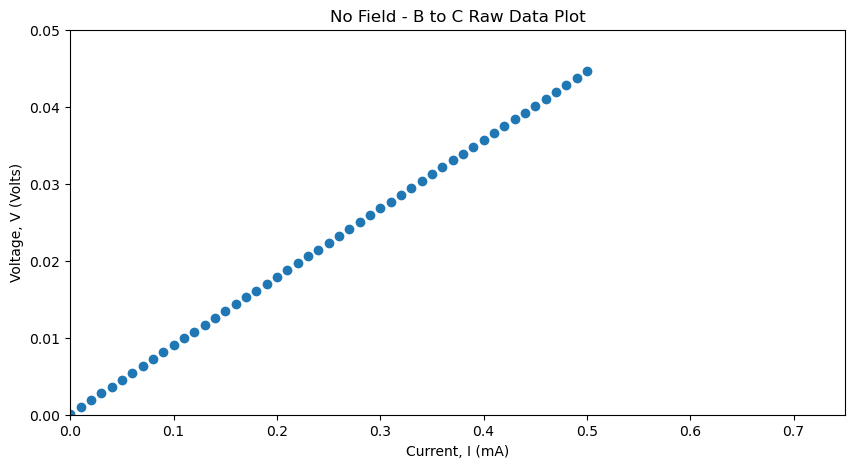

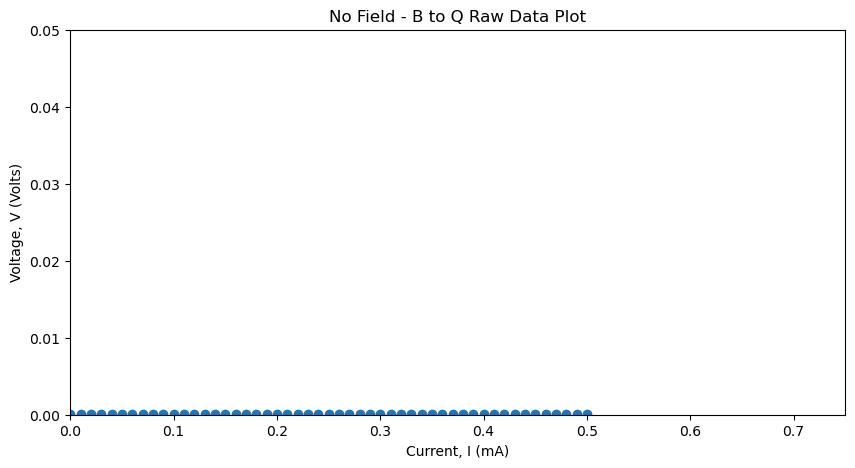

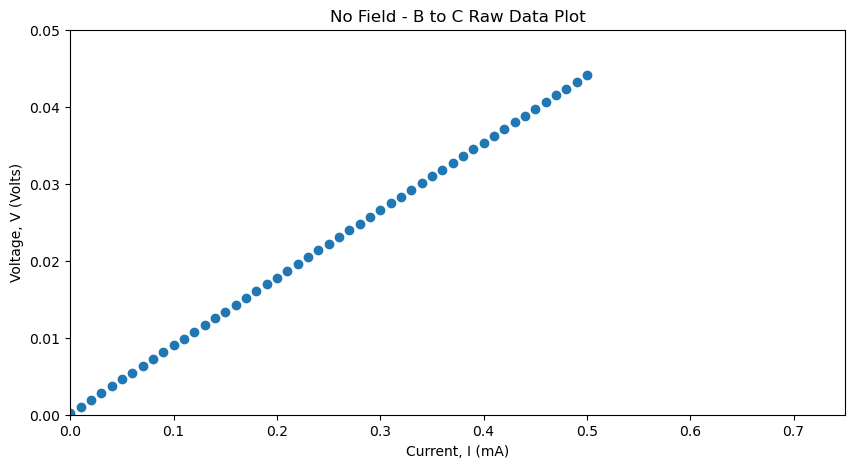

In [10]:
##############
# Import data
##############

BC_df = pd.read_csv("ST-C1-BC.csv")
BQ_df = pd.read_csv("ST-C1-BQ.csv")
BR_df = pd.read_csv("ST-C1-BR.csv")

print(f"Measure B to C: \n{BC_df.head()}, \nMeasure B to Q: \n {BQ_df.head()}, \nMeasure B to R: \n{BR_df.head()}")


##############
# Plot data
##############

BC_x = 1E3*BC_df["Value"] # grab column, we're converting to mA
BC_y = BC_df["Reading"] # grab column
plt.figure(figsize=(10,5)) # set figure size
plt.xlim(0, 0.75) # x axis limits
plt.ylim(0, 0.05) # y axis limits
plt.xlabel("Current, I (mA)") # x axis label
plt.ylabel("Voltage, V (Volts)") # y axis label
plt.title("No Field - B to C Raw Data Plot") # plot title
plt.plot(BC_x, BC_y, 'o') # plot data
plt.savefig("ST_C1_BC")
plt.show()

BQ_x = 1E3*BQ_df["Value"] # grab column
BQ_y = BQ_df["Reading"] # grab column
plt.figure(figsize=(10,5)) # set figure size
plt.xlim(0, 0.75) # x axis limits
plt.ylim(0, 0.05) # y axis limits
plt.xlabel("Current, I (mA)") # x axis label
plt.ylabel("Voltage, V (Volts)") # y axis label
plt.title("No Field - B to Q Raw Data Plot") # plot title
plt.plot(BQ_x, BQ_y, 'o')
plt.savefig("ST_C1_BQ")
plt.show()

BR_x = 1E3*BR_df["Value"] # grab column
BR_y = BR_df["Reading"] # grab column
plt.figure(figsize=(10,5)) # set figure size
plt.xlim(0, 0.75) # x axis limits
plt.ylim(0, 0.05) # y axis limits
plt.xlabel("Current, I (mA)") # x axis label
plt.ylabel("Voltage, V (Volts)") # y axis label
plt.title("No Field - B to C Raw Data Plot") # plot title
plt.plot(BR_x, BR_y, 'o')
plt.show()

# Data Fitting w/ Uncertainties
We're going to set up our linear fit. Plot it to visualize how awesome it is. To finish we always print our key variables and their uncertainty

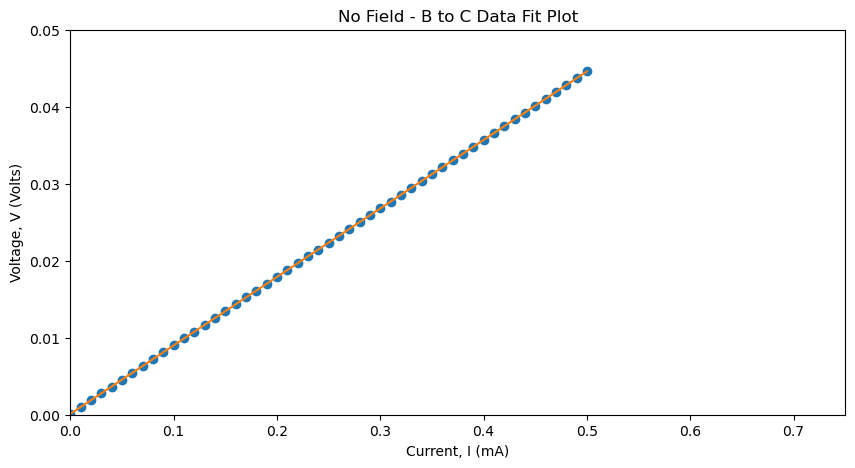

In [9]:
slope, intercept, r_value, p_value, std_err = linregress(BC_x, BC_y)
lin_fit = intercept + slope*BC_x

# Plot Results:
plt.figure(figsize=(10,5)) # set figure size
plt.xlim(0, 0.75) # x axis limits
plt.ylim(0, 0.05) # y axis limits
plt.xlabel("Current, I (mA)") # x axis label
plt.ylabel("Voltage, V (Volts)") # y axis label
plt.title("No Field - B to C Data Fit Plot") # plot title
plt.plot(BC_x, BC_y, 'o') # plot data
plt.plot(BC_x, lin_fit) # plot linear fit
plt.savefig("ST_C1_BC_Fit")
plt.show()

In [8]:
print(f"Resistance: {slope}, Uncertainty: {std_err}")

Resistance: 0.08897321465189999, Uncertainty: 3.939627401577238e-06
